# region_interface_areas
An example for the use of porespy.metrics.region_interface_areas

Calculates the interfacial area between all pairs of adjecent regions.

### Import packages

In [1]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

### Create image and variables:

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  73
Peaks after trimming saddle points:  66
Peaks after trimming nearby peaks:  64
------------------------------------------------------------
Finding surface area of each region
100%|██████████| 64/64 [00:00<00:00, 675.01it/s]


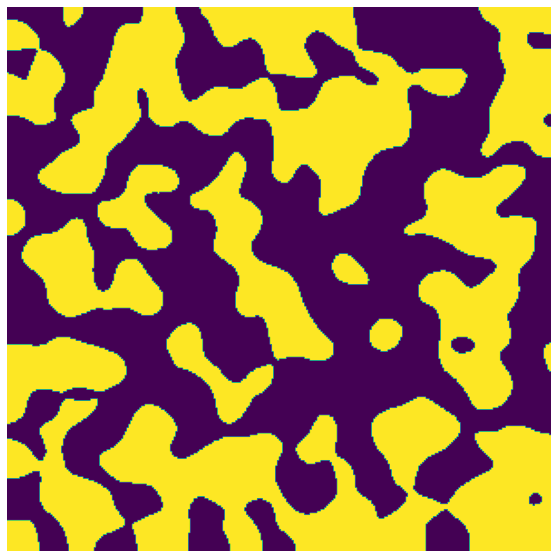

In [2]:
skel = ps.generators.blobs(shape=[300, 300])
branch_points = None
iterations = 10
im = ps.filters.prune_branches(skel, branch_points, iterations)
r = ps.filters.snow_partitioning(
    im, dt=None, r_max=4, sigma=0.4, return_all=True, mask=True, randomize=True
)
regions = r.regions
areas = ps.metrics.region_surface_areas(regions, voxel_size=1, strel=None)

#default values:
voxel_size = 1
strel = None

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

### Apply metric function:

Output is a tuple with elements conns and area.

### default

In [3]:
x = ps.metrics.region_interface_areas(regions, areas, voxel_size, strel)

------------------------------------------------------------
Finding interfacial areas between each region
100%|██████████| 64/64 [00:00<00:00, 440.37it/s]


Plot results:

Text(0.5, 1.0, 'Area')

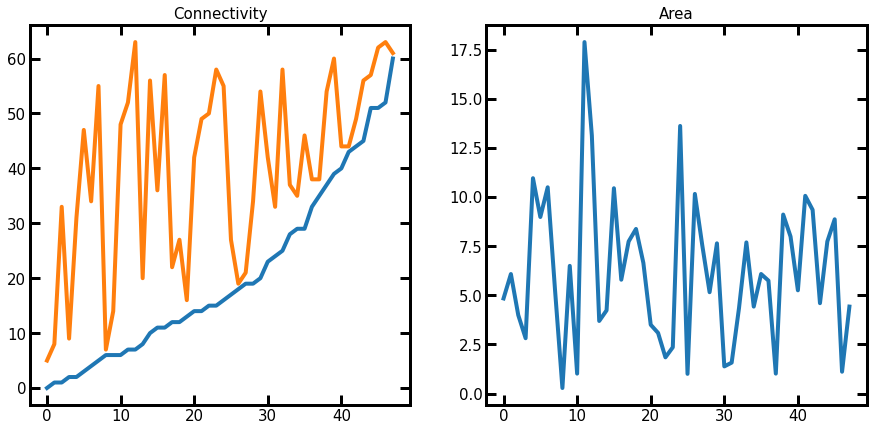

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.conns)
ax[1].plot(x.area)
ax[0].set_title("Connectivity")
ax[1].set_title("Area")

### voxel_size

In [5]:
x = ps.metrics.region_interface_areas(regions, areas, 10, strel)

------------------------------------------------------------
Finding interfacial areas between each region
100%|██████████| 64/64 [00:00<00:00, 445.19it/s]


Plot results:

Text(0.5, 1.0, 'Area')

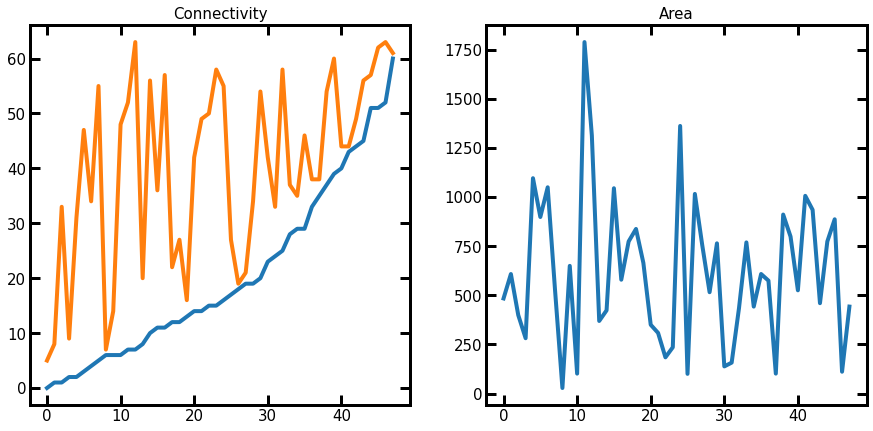

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.conns)
ax[1].plot(x.area)
ax[0].set_title("Connectivity")
ax[1].set_title("Area")